<h2 align='center'>FINAL PROJECT OF ADVANCED STATISTICS FOR PHYSICS ANALYSIS</h2>
<img align='Center' width="500" src='https://800anniunipd.it/wp-content/uploads/2018/12/logo_800anni.png' alt='Drawing' style='width:10;'/>


<h1 align='center'>Naive Bayes Classifier for Fake News recognition


<h3 align='left'>University of Padua - Physics of Data</h3>

**Name** 
    
Sarvenaz Babakhani
    
Reza Rajaee
    
Bahaor Amjadi

## Table of contents:
- [Introduction](#Introduction)
- [Theoreticl Background](#Theoreticl-Background)
- [Reading the Data](#read)
- [Preprocessing and Cleaning the Dataset](#clean)
- [Splitting into Train and Test](#split)
- [Building the Classifer](#building)
- [Building the Predictor](#pred)
- [Building Functions for Everything](#compact)
- [Wrapping Up Everything!](#wrap)
- [Multinomial Classification](#multi)
- [Binomial Classification](#bino)
- [A Deeper Look into the Dataframe](#deep)
- [Hyper Parameter Tuning (Multinomial Case)](#hyper)
- [Hyper Parameter Tuning (Binomial Case)](#hyperbino)
- [Accuracies on Test Set](#acc)
- [Computation Time](#comp)
- [Testing the Model on LabelLess Dataset](#less)
- [Conclusion](#con)
- [Bibliograohy](#bib)

# Introduction <a class="anchor" id="Introduction"></a>

The idea of fake news is not a novel concept. Notably, the idea has been in existence even before the emergence of
the Internet as publishers used false and misleading information to further their interests. Following the advent of the web, more and more consumers began forsaking the traditional media channels used to disseminate information for online platforms.They are everywhere in our daily life, and come especially from social media platforms and applications in the online world. The aim of the fake news project is to help news readers to identify bias and misinformation in news articles in a quick and reliable fashion.

In this project, we try to implement a Multinomial Naive Bayes classifier in R and test its performances in the classification of social media posts.

Data is taken from Kaggle and it consists of a training set with 10,240 instances and a test set wth 1,267 instances.

# Theoreticl Background <a class="anchor" id="Theoreticl-Background"></a>

Naive Bayes is a simple technique for constructing classifiers.This models assigns class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set. There is not a single algorithm for training such classifiers, but a family of algorithms based on a common principle: all naive Bayes classifiers assume that the value of a particular feature is independent of the value of any other feature, given the class variable.
For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. A naive Bayes classifier considers each of these features to contribute independently to the probability that this fruit is an apple, regardless of any possible correlations between the color, roundness, and diameter features.
it is mostly used for text data analysis and are connected to classification tasks of text in multiple classes.

The crux of this probabilistic machine learning model is based on the Bayes theorem:

$$P(A|B,I)=\frac{P(B|A,I)P(A|I)}{P(B|I)}$$

In this project A is label for each news and B is set of words in that news.
$$B=(b_{1},b_{2},...,b_{n})$$
using chain rule and we will have: 
$$P(A|b_{1},b_{2},...,b_{n},I)=\frac{P(b_{1}|A,I)P(b_{2}|A,I)...P(b_{n}|A,I)P(A|I)}{P(b_{1}|I)P(b_{2}|I)...P(b_{n}|I)}$$

For all entries in each label, the denominator does not change, it remain static. Therefore, the denominator can be removed and a proportionality can be introduced.

$$P(A|b_{1},b_{2},...,b_{n},I)\propto P(A|I)\prod_{i=1}^{n}P(b_{i}|A)$$

Finally, we need to find the class A with maximum probability:
$$A = argmax P(A|I)\prod_{i=1}^{n}P(b_{i}|A)$$

### project procedure
According to this theory, after preparing data, we build and apply our model on training dataset.

Then use two function,"naiveBayes"(from e1071 library) and "fnb.multinomial"(from  fastNaiveBayes library) to compare accuracy and computation time of them with our model. 

Finally we apply the model on the Test dataset.

#### More detail on Algorithm
prepared train dataset is a matrix of all possible words as column names and and thier frequencies in each news.

example 1:

| label | abort | absolut | abus |accept | access | accid
| --- | --- | --- | --- | --- | --- | --- |
| 1 | 1 | 0 | 3 | 0 | 0 | 1 |
| 1 | 1 | 1 | 5 | 0 | 1 | 2 |
| 2 | 2 | 0 | 0 | 0 | 0 | 1 |
| 1 | 0 | 0 | 2 | 0 | 1 | 0 |

To build the model, we grouped data by labels and sum each words' frequencies. By normalizing them to total sum in each group , we find probability of each world in that label ($P(b_{i}|A)$). we also calculate $P(A|I)$ by finding the ratio of the number of each label to their total number.

example 2:

| label_prob | label | abort | absolut | abus |accept | access | accid|
|---| --- | --- | --- | --- | --- | --- | --- |
| 0.2 | 0 | 0.01 | 0 | 0.3 | 0 | 0.5 | 0.001 |
| 0.19 | 1 | 0 | 0.004 | 0.02 | 0.1 | 0 | 0.003 |
| 0.18 | 2 | 0.04 | 0.09 | 0.01 | 0 | 0| 0 |
| 0.21 | 3 | 0 | 0.1 | 0.04 | 0.65 | 0.002 | 0.04 |
| 0.23 | 4 | 0 | 0 | 0.2 | 0.16 | 0.87 | 0.002 |
| 0.17 | 5 | 0.01 | 0 | 0 | 0.19 | 0.4 | 0.3 |



The resulting data frame can be used as model. Since in the next step it will be used to determine prior and likelihood.

Test dataset will be prepared same as train set. For each news there are some words and their frequencies. we should calculate:


$$P(A|I)\prod_{\text{all words of news}}(P(b_{i}|A))^{\text{it's frequncy in test news}}$$

now we just need find which label has the the maximum probabilty.


$\textbf{Notice:}$
As it is mentioned, in train set , each word's frequncy is determined. if the frequency of a word in one label is zero the probability of that in model data frame will be zero ($P(b_{i}|A)=0$). so in calculation of test news when it contains that word, the final probability for that label will be zero, even if other words' probability are high. this cause that label is not the choosen by a wrong reason.
to solve this problem , we add 1 to all frequencies in train data set and we won't have any zero probability for words in test news.

example of the problem:

if one news contains "abort" and "abus", according to tabel in example 2, $p(\text{"abort"}|label_0) = 0$ , to classify this news no matter how $p(\text{"abus"}|label_0)$ is bigger than other labels, $P(lable_0) = 0 $



In [3]:
library(gmodels)
library(tm)
library(SnowballC)
library(e1071)
library(wordcloud)
# library(ggplot2)
library(dplyr)
library(lattice)
library(gridExtra)
# library(fastNaiveBayes)

Warning message:
"package 'tm' was built under R version 3.6.3"Loading required package: NLP
Warning message:
"package 'NLP' was built under R version 3.6.3"Warning message:
"package 'SnowballC' was built under R version 3.6.3"Warning message:
"package 'e1071' was built under R version 3.6.3"Warning message:
"package 'wordcloud' was built under R version 3.6.3"Loading required package: RColorBrewer
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gridExtra' was built under R version 3.6.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



## Reading the Data <a class="anchor" id="read"></a>

The data used in this project is a collection of news texts each with different labels which can be found Kaggle dataset: https://www.kaggle.com/datasets/anmolkumar/fake-news-content-detection?select=train.csv

<p align="left">
<img src="figures/labels.png"  width="400"/> </p>
<p align="left">

The training set looks like the following:

In [4]:
DF <- read.csv("./data/train.csv")
head(DF)
cat("dataset size:", nrow(DF))

Labels,Text,Text_Tag
1,Says the Annies List political group supports third-trimester abortions on demand.,abortion
2,When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.,"energy,history,job-accomplishments"
3,"Hillary Clinton agrees with John McCain ""by voting to give George Bush the benefit of the doubt on Iran.""",foreign-policy
1,Health care reform legislation is likely to mandate free sex change surgeries.,health-care
2,The economic turnaround started at the end of my term.,"economy,jobs"
5,The Chicago Bears have had more starting quarterbacks in the last 10 years than the total number of tenured (UW) faculty fired during the last two decades.,education


dataset size: 10240

And the test set:

In [15]:
DF.test <- read.csv("./data/test.csv")
head(DF.test)
cat("dataset size:", nrow(DF.test))

Text,Text_Tag
Building a wall on the U.S.-Mexico border will take literally years.,immigration
Wisconsin is on pace to double the number of layoffs this year.,jobs
Says John McCain has done nothing to help the vets.,"military,veterans,voting-record"
Suzanne Bonamici supports a plan that will cut choice for Medicare Advantage seniors.,"medicare,message-machine-2012,campaign-advertising"
"When asked by a reporter whether hes at the center of a criminal scheme to violate campaign laws, Gov. Scott Walker nodded yes.","campaign-finance,legal-issues,campaign-advertising"
Over the past five years the federal government has paid out $601 million in retirement and disability benefits to deceased former federal employees.,"federal-budget,pensions,retirement"


dataset size: 1267

As one can see the test.csv file which was supposed to be used as the test set of the project does not contain lables for the news. Therefore there is no way to evaluate the performace of model on the latter. To deal with this issue we dedicate a portion of the training set as a new test set with labels.

In [21]:
label.list <- c(0,1,2,3,4,5)   #the lables we want to be considered in the model

filtered dataset size: 10240

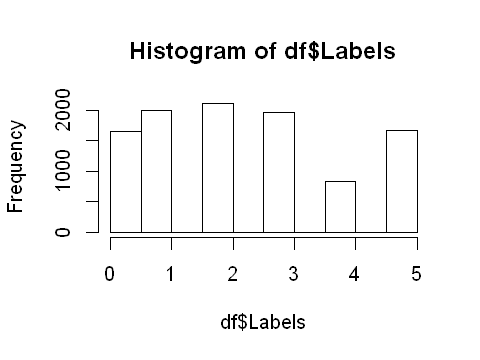

In [22]:
df <- DF[DF$Labels %in% label.list, ]   #filtering the dataframe for the lables in label.list
cat("filtered dataset size:", nrow(df))
options(repr.plot.width=4, repr.plot.height =3)    #changing size of plots
hm <- hist(df$Labels)  #saving for later use in the predictor function

# Preprocessing and Cleaning the Data <a class="anchor" id="clean"></a>

Preprocessing the data is usually an essential step in any machine learning tasks. We start by converting our dataframe to a Corpus, then apply some text mining transformations to obtain a clear collection of text documents. All document are then shrinked in a tabular form called Document Term Matrix which provides us with the frequency of each word in a sentence. This structure will later help us when building our classifer. 

## Dataframe to Corpus

#### The main structure for managing documents in tm library is a so-called Corpus, representing a collection of text documents. 

In [18]:
df_corp <- VCorpus(VectorSource(as.character(df$Text)))
df_corp

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 10240

We can gain some information on the corpus using inspect()

In [19]:
inspect(df_corp[1:2])

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 2

[[1]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 82

[[2]]
<<PlainTextDocument>>
Metadata:  7
Content:  chars: 141



To access and view a specific document:

In [20]:
inspect(df_corp[[2]])   #accessing a sepecific element

<<PlainTextDocument>>
Metadata:  7
Content:  chars: 141

When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration.


And to view multiple document texts at the same time:

In [21]:
lapply(df_corp[1:3], as.character)

$`1`
[1] "Says the Annies List political group supports third-trimester abortions on demand."

$`2`
[1] "When did the decline of coal start? It started when natural gas took off that started to begin in (President George W.) Bushs administration."

$`3`
[1] "Hillary Clinton agrees with John McCain \"by voting to give George Bush the benefit of the doubt on Iran.\""

## Transformations

Once having the corpus we typically like to do some transformations:

In [22]:
df_corp <- tm_map(df_corp,content_transformer(tolower))  #lowercasing every letter
df_corp <- tm_map(df_corp,removeNumbers)                 #removing the numbers
df_corp <- tm_map(df_corp,removeWords,stopwords())       #remving words like: and, the, is, it ,..

lapply(df_corp[1:3], as.character)

$`1`
[1] "says  annies list political group supports third-trimester abortions  demand."

$`2`
[1] "   decline  coal start?  started  natural gas took   started  begin  (president george w.) bushs administration."

$`3`
[1] "hillary clinton agrees  john mccain \" voting  give george bush  benefit   doubt  iran.\""

In [23]:
df_corp <- tm_map(df_corp,removePunctuation) # removing punctuations like: !,?, ., ;
lapply(df_corp[1:3], as.character)

$`1`
[1] "says  annies list political group supports thirdtrimester abortions  demand"

$`2`
[1] "   decline  coal start  started  natural gas took   started  begin  president george w bushs administration"

$`3`
[1] "hillary clinton agrees  john mccain  voting  give george bush  benefit   doubt  iran"

In [24]:
wordStem(c("political","politic","politics"))

[1] "polit" "polit" "polit"

In [25]:
df_corp <- tm_map(df_corp,stemDocument)   #applying word stemming

In [26]:
df_corp <- tm_map(df_corp,stripWhitespace)
lapply(df_corp[1:3], as.character)

$`1`
[1] "say anni list polit group support thirdtrimest abort demand"

$`2`
[1] "declin coal start start natur gas took start begin presid georg w bush administr"

$`3`
[1] "hillari clinton agre john mccain vote give georg bush benefit doubt iran"

Now that the transformations are done we convert the corpus to another entity called Document Term Matrix:

## Document Term Matrix (DTM)

 A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents. In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.

<p align="left">
<img src="figures/CorpusToDtm.jpg"  width="600"/> </p>
<p align="left">
[Ref: Data Science Authority India's First Experiential Learning Program in Data Science]

In [27]:
df_dtm  <- DocumentTermMatrix(df_corp)
df_dtm

<<DocumentTermMatrix (documents: 10240, terms: 8226)>>
Non-/sparse entries: 101816/84132424
Sparsity           : 100%
Maximal term length: 68
Weighting          : term frequency (tf)

#### We can also do the transformations at same time we are converting the corpus to DTM:

In [16]:
# df_dtm  <-  DocumentTermMatrix(df_corp,
#                            control = list(tolower = TRUE,
#                                           removeNumbers = TRUE,
#                                           stopwords = TRUE,
#                                           removePunctuation = TRUE,
#                                           stemming = TRUE))

### Removing the Words with Low Number of Repetition

an act which is usually done when working with text classifier models is to set a minimum frequency on repetance of the words. Words which are repeated less than a certain number in the whole dataset are removed. As we illustrate later this helps with a reduction in the complexity of the predictor therefore preventing the model the overfit on the test data.

In [17]:
minfreq     <-  10                                #words with frequency of repetition less that minfreq will be removed
freq_words  <-  findFreqTerms(df_dtm, minfreq)   #findFreqTerms finds the list of words with higher frequecny than minfreq
df_dtm      <-  df_dtm[,freq_words]              #keeping only the frequent words

## Word Visualization

Wordcould is a library which helps us to visualize words in a pleasent way based on the frequecny in the whole datset.The higher number of repetitions a word has, larger it fontsize becomes.

In [18]:
#defining a function which to prepare the needed data before feeding it to wordcloud
w_cloud <- function(df){
    
    #basically applyting the former transformations, nothing new to be discussed
    df$Text = as.character(df$Text)
    df <- VCorpus(VectorSource(df$Text))
    df <- tm_map(df ,content_transformer(tolower)) 
    df <- tm_map(df ,removeNumbers)              
    df <- tm_map(df ,removeWords,stopwords())    
    df <- tm_map(df ,removePunctuation)         
    df <- tm_map(df ,stemDocument)
    df <- tm_map(df ,stripWhitespace)          
    
    wordcloud(df,min.freq = 10,,colors=brewer.pal(8, "Dark2"), rot.per=0.35) #max.words is most common words
}

#### We plot the wordclouds splitting the fake news(label 1) from the true news(label5). Let's see if we can notice any difference between them.

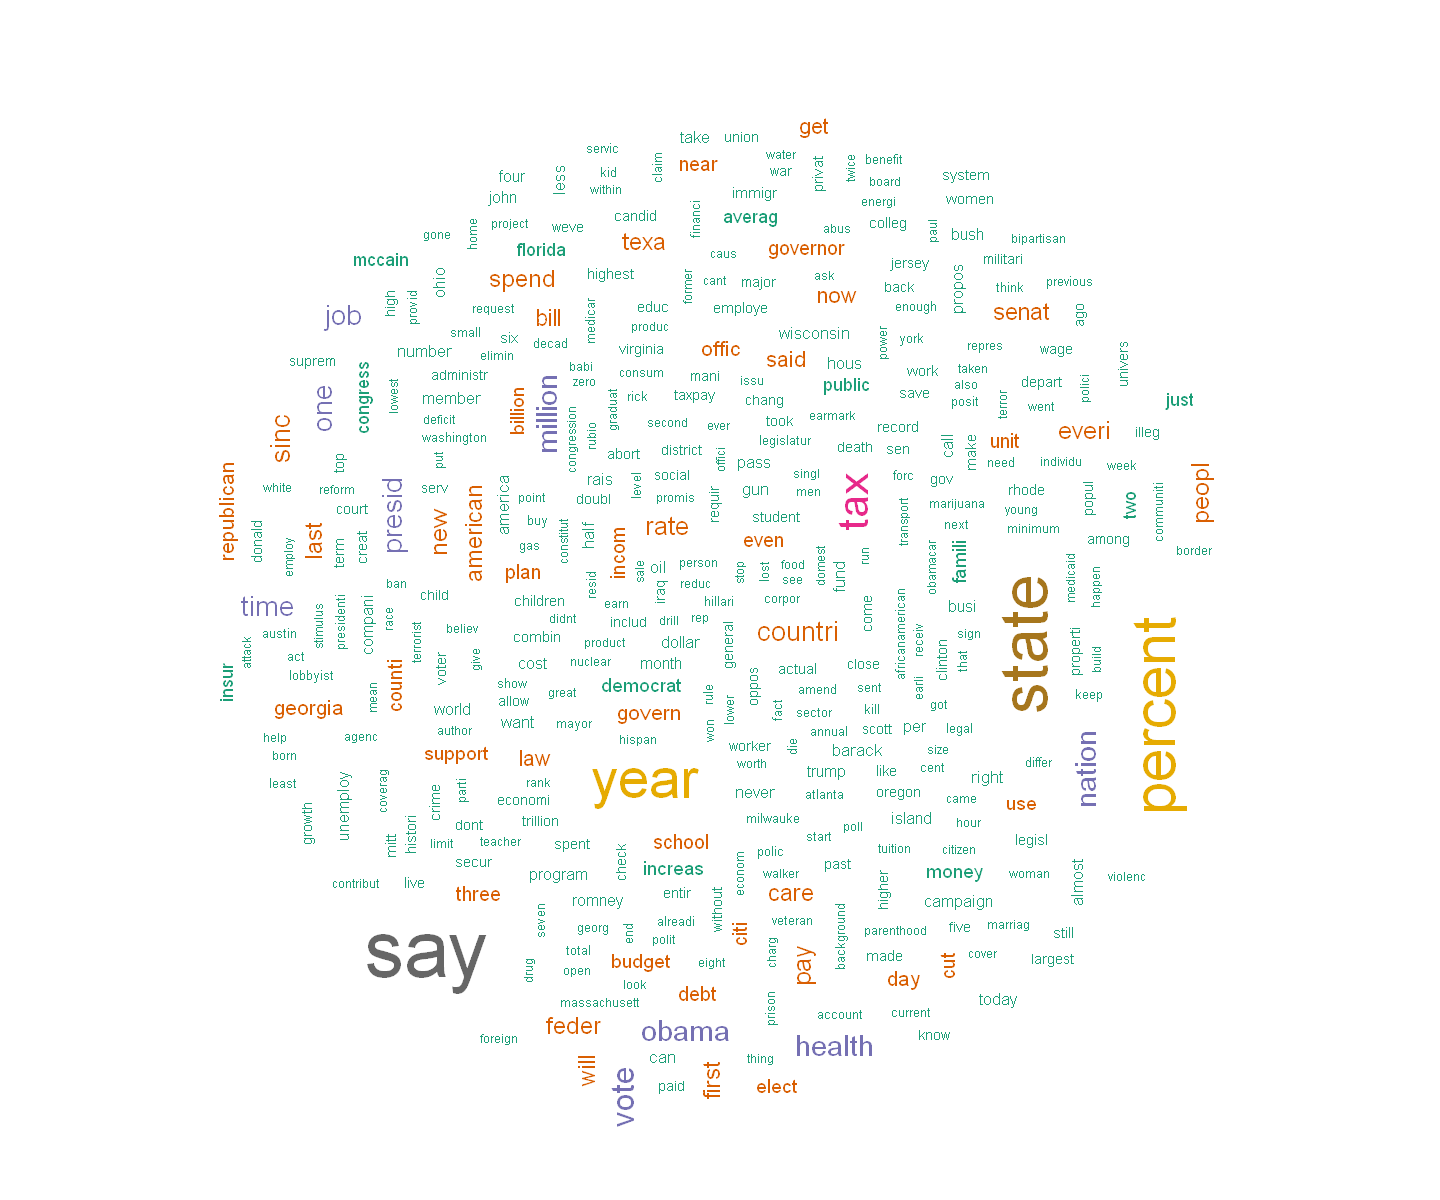

In [19]:
options(repr.plot.width=12, repr.plot.height =10)  #changing size of plots

df_fake <- subset(df,Labels == 1)
df_true <- subset(df,Labels == 5)

#for the true news:
w_cloud(df_true)  

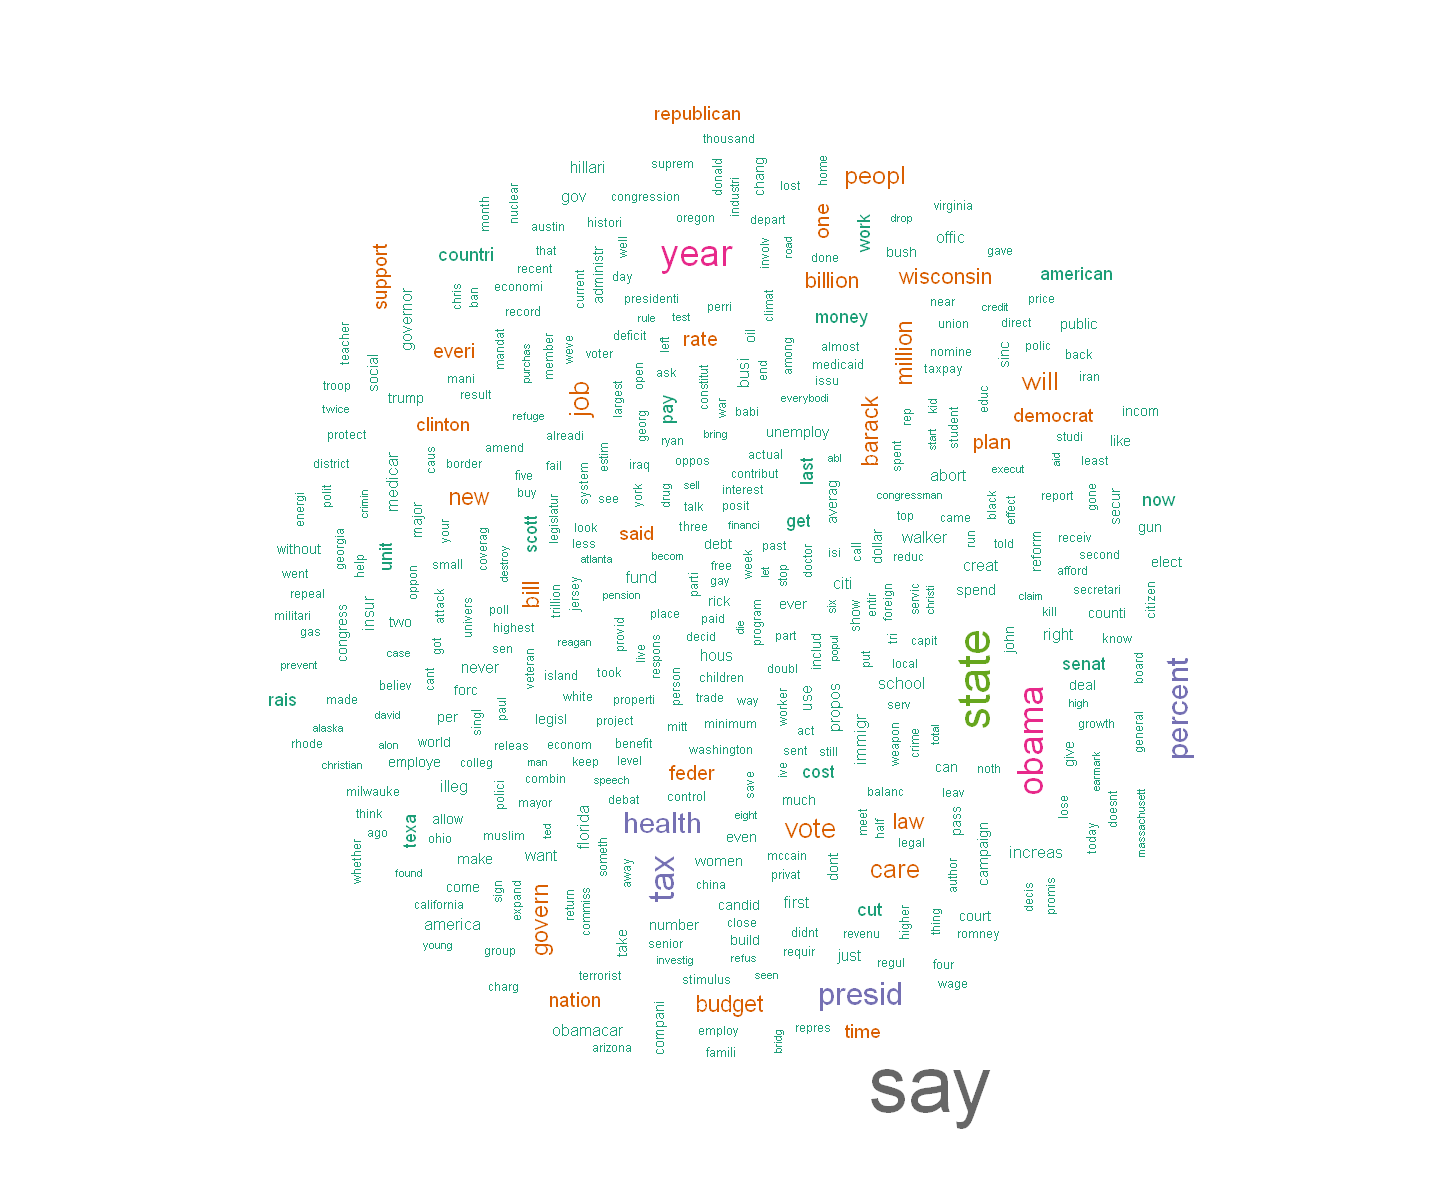

In [20]:
#for the fake news:
w_cloud(df_fake)

## Splitting into Train and Test <a class="anchor" id="split"></a>

We split the whole dataframe into Train/Test and further a validation set to perform hyper-paramter tuning. As usual the model is trained on the training set and being provided with a classifer/predictor, the performance of the model is tested on the test set. The ratios of splitting is as follows:

<p align="left">
<img src="figures/split.png"  width="400"/> </p>
<p align="left">

In [40]:
test_ratio <- 0.15
SEED       <- 5

X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
Y   <- df$Labels

set.seed(SEED)
test_size  <- as.integer(nrow(X)* test_ratio)
train_size <- nrow(X) - test_size

test_index <- sample(seq(1:nrow(X)), test_size)

X_test    <- X[test_index, ]         #reading the features from the document term matrix
Y_test    <- Y[test_index  ]         #reading the labels from the initial dataframe

X_train   <- X[! seq(1:nrow(X)) %in% test_index, ]
Y_train   <- Y[! seq(1:nrow(X)) %in% test_index  ]

X_val     <- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
Y_val     <- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]

X_train   <- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ] 
Y_train   <- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]

cat("Train  Set Size:", nrow(X_train))
cat("\nTest   Set Size:", length(Y_test))
cat("\nValid. Set Size:", length(Y_val))
# cat("\nThe sum of Samples:", sum(nrow(X_train), length(Y_test), length(Y_val)))   #sanity check

Train  Set Size: 7138
Test   Set Size: 1536
Valid. Set Size: 1566

# Building the Classifer <a class="anchor" id="building"></a>

Now having all cards on the table we start to build a NaiveBayes Multinomial Classifer exactly as what is described in the introduction part. We start on training set and build up step by step to obtain the probability of each word occuring in a specific labels. We store all these probabilities in a final dataframe. This dataframe is basically our classifer. This classifer is then used to predict the labels of test set samples. 

Notice: for the goal of presentation we first perform everything step by step to see the result of each part. But all these procedures are wrapped up in functions that makes us able to train and predict on arbitray samples in just a few lines 

#### We start on the training set dataframe, let's have a look on it:

In [22]:
head(X_train, 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,...,year,yearold,yet,york,young,your,youth,youv,zero,zone
1849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1851,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0


Each row corresponds to one sample (a news) and the columns are a collection of all the words in the dataframe. Each element of the above table corresponds to the number of repetition a word has in a specific sample. Like if we consider the sample: "hillary clinton agrees john mccain" then at the specifit row of this sample, the correponding columns of "hillary","clinton","agrees", "john", "mccain" become 1 and all other words get zero 

#### Now we bind the corresponding label of each sample to the previous dataframe:

In [23]:
head(cbind(X_train, Y_train), 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,...,yearold,yet,york,young,your,youth,youv,zero,zone,Y_train
1849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1850,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1851,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#### We group by labels and summing over all the words in each label:

In [24]:
df_count <- aggregate(.~Y_train, cbind(X_train, Y_train), sum) #grouping by labels and counting the frequency
df_count

Y_train,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,...,year,yearold,yet,york,young,your,youth,youv,zero,zone
0,3,2,7,2,19,1,3,4,6,...,133,3,7,9,2,8,2,0,4,1
1,2,4,6,4,22,2,3,5,2,...,134,2,2,8,5,12,1,1,3,0
2,5,2,3,0,21,1,1,4,9,...,191,0,7,6,12,8,3,2,6,5
3,3,5,10,0,8,3,1,6,5,...,189,2,5,10,6,9,3,5,4,0
4,0,0,1,1,6,3,0,3,2,...,36,1,2,3,0,0,0,0,4,2
5,0,0,3,0,18,2,8,4,5,...,166,1,3,11,6,4,1,4,6,0


#### This way know that cosidering a specific label, how many times a specific word is repeated

#### Then we go add one to all the elements. The reason for this was discussed in the Introduction part

In [25]:
df_count <- df_count + 1
df_count

Y_train,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,...,year,yearold,yet,york,young,your,youth,youv,zero,zone
1,4,3,8,3,20,2,4,5,7,...,134,4,8,10,3,9,3,1,5,2
2,3,5,7,5,23,3,4,6,3,...,135,3,3,9,6,13,2,2,4,1
3,6,3,4,1,22,2,2,5,10,...,192,1,8,7,13,9,4,3,7,6
4,4,6,11,1,9,4,2,7,6,...,190,3,6,11,7,10,4,6,5,1
5,1,1,2,2,7,4,1,4,3,...,37,2,3,4,1,1,1,1,5,3
6,1,1,4,1,19,3,9,5,6,...,167,2,4,12,7,5,2,5,7,1


#### The sum of each row is calculated as the total number of words for each label.

In [26]:
df_count$Y_train   <- NULL               #dropping an unneseccary column
df_count$total.num <- rowSums(df_count)  #summing over the rows
df_count <- cbind(label.list, df_count)  #adding a label column
colnames(df_count)[1] <- "Label"         #naming the column
df_count

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,...,yearold,yet,york,young,your,youth,youv,zero,zone,total.num
0,4,3,8,3,20,2,4,5,7,...,4,8,10,3,9,3,1,5,2,12182
1,3,5,7,5,23,3,4,6,3,...,3,3,9,6,13,2,2,4,1,13427
2,6,3,4,1,22,2,2,5,10,...,1,8,7,13,9,4,3,7,6,15413
3,4,6,11,1,9,4,2,7,6,...,3,6,11,7,10,4,6,5,1,13832
4,1,1,2,2,7,4,1,4,3,...,2,3,4,1,1,1,1,5,3,6508
5,1,1,4,1,19,3,9,5,6,...,2,4,12,7,5,2,5,7,1,12020


#### Then, the probability of each label is added to the dataframe. As previously discussed this is used as our priror

In [27]:
label.density          <- hm$density[hm$density >0]    #!!don't forget to run the reading data cell, hm is read from there!!
df_count$label.density <- label.density/2              #normalizing the probabilites to 1
df_count

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,...,yet,york,young,your,youth,youv,zero,zone,total.num,label.density
0,4,3,8,3,20,2,4,5,7,...,8,10,3,9,3,1,5,2,12182,0.16152344
1,3,5,7,5,23,3,4,6,3,...,3,9,6,13,2,2,4,1,13427,0.19482422
2,6,3,4,1,22,2,2,5,10,...,8,7,13,9,4,3,7,6,15413,0.20644531
3,4,6,11,1,9,4,2,7,6,...,6,11,7,10,4,6,5,1,13832,0.19160156
4,1,1,2,2,7,4,1,4,3,...,3,4,1,1,1,1,5,3,6508,0.08193359
5,1,1,4,1,19,3,9,5,6,...,4,12,7,5,2,5,7,1,12020,0.16367187


#### Finally we calculate the probability of the occurence of each word in each label as the following:

In [28]:
no.col <- ncol(df_count) -2         #keeping the number of word columns (without the sum and density column)

for (i in 1:length(label.list))     #looping on the 5 labels (5 rows)
    {df_count[i,2:no.col]  <- df_count[i, 2: no.col]/df_count$total.num[i]} #loop on 5 indexes
nbc <- df_count
nbc

Label,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,...,yet,york,young,your,youth,youv,zero,zone,total.num,label.density
0,3.283533e-04,2.462650e-04,0.0006567066,2.462650e-04,0.0016417665,0.0001641767,0.0003283533,0.0004104416,0.0005746183,...,0.0006567066,0.0008208833,0.0002462650,0.0007387949,0.0002462650,8.208833e-05,0.0004104416,1.641767e-04,12182,0.16152344
1,2.234304e-04,3.723840e-04,0.0005213376,3.723840e-04,0.0017129664,0.0002234304,0.0002979072,0.0004468608,0.0002234304,...,0.0002234304,0.0006702912,0.0004468608,0.0009681984,0.0001489536,1.489536e-04,0.0002979072,7.447680e-05,13427,0.19482422
2,3.892818e-04,1.946409e-04,0.0002595212,6.488030e-05,0.0014273665,0.0001297606,0.0001297606,0.0003244015,0.0006488030,...,0.0005190424,0.0004541621,0.0008434438,0.0005839227,0.0002595212,1.946409e-04,0.0004541621,3.892818e-04,15413,0.20644531
3,2.891845e-04,4.337767e-04,0.0007952574,7.229612e-05,0.0006506651,0.0002891845,0.0001445922,0.0005060729,0.0004337767,...,0.0004337767,0.0007952574,0.0005060729,0.0007229612,0.0002891845,4.337767e-04,0.0003614806,7.229612e-05,13832,0.19160156
4,1.536570e-04,1.536570e-04,0.0003073141,3.073141e-04,0.0010755993,0.0006146281,0.0001536570,0.0006146281,0.0004609711,...,0.0004609711,0.0006146281,0.0001536570,0.0001536570,0.0001536570,1.536570e-04,0.0007682852,4.609711e-04,6508,0.08193359
5,8.319468e-05,8.319468e-05,0.0003327787,8.319468e-05,0.0015806988,0.0002495840,0.0007487521,0.0004159734,0.0004991681,...,0.0003327787,0.0009983361,0.0005823627,0.0004159734,0.0001663894,4.159734e-04,0.0005823627,8.319468e-05,12020,0.16367187


### The above dataframe is our multinomial naive bayes classifer, which can be used for prediction

## Building the Predictor <a class="anchor" id="pred"></a>

Now having our classifer we write a predictor which takes a sample as the input and predicts its label:

In [29]:
# cat("words matching:", all(colnames(nbc[2:as.numeric(ncol(nbc)-2)]) == colnames(X_test)))

#### Let's have a look our test set:

In [30]:
head(X_test, 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,...,year,yearold,yet,york,young,your,youth,youv,zero,zone
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


like before we have each row pointing out to a sample and the number of repetition of each word in that sample. For each sample the label is predicted and then we compare them to the real labels to find the accuracy of the model.

#### The following function takes a test sample as input and predicts it corresponding label

In [38]:
df.one.func <- function(x, output){
    prob.finder      <- function(x, ouput){return(prod(x[2:length(x)]))}  #a function which stores the product of all probs.  
    df.one           <<- nbc[, c(1, ncol(nbc), which(x == 1) + 1)]        #used for reading the probs of words from classifer
    df.final         <<- cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder)) #dataframe of porbs for each sample 
    predicted_label  <- df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))] #the final predicted label 
    return(predicted_label)}

X_test_all <- cbind(X_test, predicted_label= apply(X_test ,1,df.one.func)) #adding the prediceted labels to the test set
Y_pred     <- X_test_all$predicted_label                                   #reading the prediction seperately

Considering a specific sample in test dataset, first we retrieve the words residing in that sample. Then we read the probabilty of each word occuring in a the correpsonding label from our predictor table. 

#### The following dataframe would be constructed as the result for each sample in the test set

In [40]:
head(df.final) #it is for a specific sample

Label,label.density,avoid,bill,financ,florida,give,gov,law,offici,person,public,rick,scott,sign,way,Label.Prob
0,0.16152344,0.0001641767,0.004679035,4.104416e-04,0.002380561,0.0014775899,0.001970120,0.004268593,0.0009850599,0.0009850599,0.003037268,0.0012313249,0.002380561,0.0010671483,0.0004925300,6.840427e-42
1,0.19482422,0.0002234304,0.005138899,2.234304e-04,0.002159827,0.0018619200,0.002606688,0.004096224,0.0004468608,0.0010426752,0.002010874,0.0015640128,0.003574886,0.0008937216,0.0005958144,5.986490e-42
2,0.20644531,0.0003892818,0.004346980,3.244015e-04,0.002919613,0.0011029650,0.001622007,0.003568416,0.0003892818,0.0007785636,0.002530332,0.0016220074,0.002011289,0.0009083241,0.0007785636,3.737256e-42
3,0.19160156,0.0001445922,0.004193175,7.229612e-05,0.002747253,0.0010121457,0.001373626,0.003253326,0.0002891845,0.0015905147,0.002168884,0.0014459225,0.001445922,0.0009398496,0.0005783690,1.183157e-43
4,0.08193359,0.0001536570,0.004609711,4.609711e-04,0.001843884,0.0007682852,0.002612170,0.003073141,0.0006146281,0.0010755993,0.001382913,0.0019975415,0.003380455,0.0004609711,0.0004609711,3.990967e-43
5,0.16367187,0.0002495840,0.003577371,4.159734e-04,0.002412646,0.0007487521,0.001081531,0.003161398,0.0006655574,0.0009151414,0.002412646,0.0008319468,0.001081531,0.0005823627,0.0005823627,1.683677e-43


Then according to naive bayes algorithm the porbability of each label is the row product of all columns residing in the above table. We do the multipication and store the label with maximum probability as the predicted label for that specific test sample.

#### The previous process is repeated on all the samples in the test set and a column of predicted lables is obtained at the end 

#### The final output will be like the following; each sample, and its predicted label

In [41]:
head(X_test_all, 3)

,abbott,abil,abl,abolish,abort,absolut,abus,accept,access,accid,...,yearold,yet,york,young,your,youth,youv,zero,zone,predicted_label
2255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6859,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


#### The accuracy of the prediction is defined as the number of correct predictions over total number of predictions:

In [42]:
score <- function(Y_test, Y_pred){length(Y_test[Y_test == Y_pred])/length(Y_test)} 

## Now Let's Wrap Up Everything Together! <a class="anchor" id="wrap"></a>

## Cleaning and Filtering the Dataset [Compact Version]

In [29]:
df_cleaner <- function(df, threshold, minfreq, binom){
    
    df_corp <- VCorpus(VectorSource(as.character(df$Text)))
    df_corp <- tm_map(df_corp ,stripWhitespace)                #removing white spaces
    df_dtm <-  DocumentTermMatrix(df_corp,
                               control = list(tolower = TRUE,
                                            removeNumbers = TRUE,
                                            stopwords = TRUE,
                                            removePunctuation = TRUE,
                                            stemming = TRUE))
if (binom==TRUE){

    #finding frequent terms for each label:
    fake_freq <- findFreqTerms(df_dtm [which(df$Labels==1), ],minfreq)
    true_freq <- findFreqTerms(df_dtm [which(df$Labels==5), ],minfreq)

    simil_words <- intersect(fake_freq,true_freq)

    #finding the frequency of each word
    frequency_true    <-  slam::col_sums(df_dtm[which(df$Labels==5), ])
    frequency_fake    <-  slam::col_sums(df_dtm[which(df$Labels==1), ])

    frequency_true    <-  frequency_true[frequency_true >= minfreq]
    frequency_fake    <-  frequency_fake[frequency_fake >= minfreq]

    frequency_df_true <-  data.frame(words  = names(frequency_true), freq.true = frequency_true , row.names = NULL)
    frequency_df_fake <-  data.frame(words  = names(frequency_fake), freq.fake = frequency_fake , row.names = NULL)

    frequency_df_true <-  frequency_df_true[order(-frequency_df_true$freq),]
    frequency_df_fake <-  frequency_df_fake[order(-frequency_df_fake$freq),]

    # cat('words among true the news:')
    # head(frequency_df_true)
    # cat('words among the fake news:')
    # head(frequency_df_fake)

    simil_true <- frequency_df_true[frequency_df_true$words %in% simil_words, ]
    simil_fake <- frequency_df_fake[frequency_df_fake$words %in% simil_words, ]

    all_simil  <- merge(simil_true, simil_fake, by="words")

    diff.func <- function(x, ouput){
      A = as.numeric(x[2])
      B = as.numeric(x[3])
      rate <- 1- (min(A,B)/max(A,B))
      return(rate)}
    
    all_simil <-cbind(all_simil, diff.rate= apply(all_simil ,1,diff.func))
    # head(all_simil[order(-all_simil$diff.rate), ])
    Word_List <- all_simil[all_simil$diff.rate < threshold, ]$words
    # head(all_simil[all_simil$diff.rate < threshold, ])
    
    df_corp <- VCorpus(VectorSource(as.character(df$Text)))
    df_corp <- tm_map(df_corp , stripWhitespace)                #removing white spaces
    df_corp <- tm_map(df_corp , removeWords, Word_List)        #removing based on the Word List obtained via thresholding
    df_dtm  <- DocumentTermMatrix(df_corp,
                                   control = list(tolower = TRUE,
                                                removeNumbers = TRUE,
                                                stopwords = TRUE,
                                                removePunctuation = TRUE,
                                                stemming = TRUE))
    }
    
freq_words <-  findFreqTerms(df_dtm,minfreq)  #minfreq is already defined## Threshold on frequecny of the word
df_dtm     <-  df_dtm[,freq_words]      
 
return(df_dtm)
# options(repr.plot.width=4, repr.plot.height =3)  #changing size of plots
# hist(all_simil$diff.rate)   
}

## Splitting Data into Train/Test Sets [Compact Version]

In [36]:
train_test_splitter <- function(df_dtm, df, test_ratio, SEED){

    X   <- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
    Y   <- df$Labels
    
    set.seed(SEED)
    test_size  <- as.integer(nrow(X)* test_ratio)
    train_size <- nrow(X) - test_size

    test_index <- sample(seq(1:nrow(X)), test_size)

    X_test    <<- X[test_index, ]         #reading the features from the document term matrix
    Y_test    <<- Y[test_index  ]     #reading the labels from the initial dataframe

    X_train   <<- X[! seq(1:nrow(X)) %in% test_index, ]
    Y_train   <<- Y[! seq(1:nrow(X)) %in% test_index  ]
    
    X_val     <<- X_train[1: (as.integer(nrow(X_train) * 0.18)),]
    Y_val     <<- Y_train[1: (as.integer(nrow(X_train) * 0.18)) ]
    
    
    X_train   <<- X_train[((as.integer(nrow(X_train)   * 0.18))+1) : nrow(X_train) ,  ] 
    Y_train   <<- Y_train[((as.integer(length(Y_train) * 0.18))+1) : length(Y_train)  ]
}

## The Classifier and The Predictor Functions

In [54]:
Train <- function(X_train, Y_train){
    df_count <- aggregate(.~Y_train, cbind(X_train, Y_train), sum) #grouping by labels and counting the frequency
    df_count <- df_count + 1 #adding one to all the counts
    df_count$Y_train <- NULL
    df_count$total.num <- rowSums(df_count)
    df_count <- cbind(label.list, df_count)
    colnames(df_count)[1] <- "Label"
    label.density <- hm$density[hm$density >0]
    df_count$label.density <- label.density ;no.col <- ncol(df_count) -2
    for (i in 1:length(label.list)){df_count[i,2:no.col]  <- df_count[i, 2: no.col]/df_count$total.num[i]} #loop on 5 indexes
    return(df_count)}

Predict <- function(nbc, X_test){

    df.one.func <- function(x, output){
        
        df.one <- nbc[, c(1, ncol(nbc), which(x != 0) + 1)]

        power       <-  c(1,1, x[which(x != 0 )])
        power.func  <- function(x, ouput){return(x <- x**power)} #each prob to the power of repeatence        
        df.one      <- t(apply(df.one ,1, power.func))           #applyting the power function
        df.one      <- data.frame(df.one)
        
        prob.finder <- function(x, ouput){return(prod(x[2:length(x)]))}
        df.final    <-cbind(df.one, Label.Prob = apply(df.one, 1, prob.finder))
        
        predicted_label <- df.final$Label[which(df.final$Label.Prob == max(df.final$Label.Prob))]

        return(predicted_label)}
    
    X_test_all <-cbind(X_test, predicted_label= apply(X_test ,1,df.one.func))
    return(X_test_all$predicted_label)}

In [32]:
score <- function(Y_train, Y_pred){length(Y_train[Y_train == Y_pred])/length(Y_train)}

## Now we repeat the previous procedure using functions [Multinomial Classification] <a class="anchor" id="multi"></a>

### Reading the Data

In [36]:
#=======filtering the dataset keeping just the label 5:true and 1:false========#

label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5

#==============================================================================#

options(repr.plot.width=5, repr.plot.height =3)    #changing size of plots
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
cat("filtered dataset size:", nrow(df))
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function

filtered dataset size: 10240

### Preprocessing on Data

In [37]:
df_dtm <- df_cleaner(df, threshold= 0, minfreq = 10, binom = FALSE)

### Splitting Dataset into Train/Test Set

In [38]:
train_test_splitter(df_dtm, df, test_ratio=0.15, SEED= 5)

Train Set Size: 7138
Test  Set Size: 1536
Validation Set Size: 1566

### Training the Model

In [50]:
nbc <- Train(X_train, Y_train)

### Predicting the Labels on Test Set

In [51]:
Y_pred_train <- Predict(nbc, X_train)
Y_pred       <- Predict(nbc, X_test)

### Accuracy of the Prediction

In [52]:
cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.4819277
Test  accuracy: 0.2063802

### The Accuracy so low?! What's the problem? Are we doing something wrong in the code?

### Let's See What is Result using Libraries: 

### NaiveBayes classifer from e1071 library

It seems that this library needs also some other modification to perfrom properly:

In [44]:
convert_counts <- function(x){x <- ifelse(x>0,"Yes","No") }
x_train <-  apply(X_train ,  MARGIN = 2,convert_counts)
x_test  <-  apply(X_test  ,  MARGIN = 2,convert_counts)

In [46]:
NBC <- naiveBayes(x_train, Y_train) #Navive Bayesian Classifer

Y_train_pred <- predict(NBC, x_train)
Y_pred       <- predict(NBC, x_test)

In [47]:
table_train  <- table(Y_train_pred ,Y_train)
table_train

cat("Train accuracy:",     score(Y_train, Y_train_pred))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

            Y_train
Y_train_pred   0   1   2   3   4   5
           0 529 157 168 131  52  84
           1 150 668 195 152  67 137
           2 157 165 633 155  37 137
           3 135 160 203 664  45 161
           4  78 107  98  67 342  80
           5 111 137 182 184  40 570

Train accuracy: 0.4771645
Test  accuracy: 0.2148438

### NaiveBayes classifer from fastnaive library

In [ ]:
fast.NBC     <- fnb.multinomial(X_train, Y_train)

Y_train_pred <- predict(fast.NBC, X_train)
Y_pred       <- predict(fast.NBC, X_test)

cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

## Also Not Good Accuracies with other Libraries

## Let's Consider a Simpler Case for a moment, A case with only true or false Labels:

# Binomial Classification <a class="anchor" id="bino"></a>

#### Now we try the case with only two labels, True = 5, Fake = 1 . All the prcodures are similar to the multinomial case

In [1]:
DF <- read.csv("./data/train.csv")

In [2]:
#=======filtering the dataset keeping just the label 5:true and 1:false========#

label.list <- c(1,5)   #the labels:0,1,2,3,4,5

#==============================================================================#

options(repr.plot.width=5, repr.plot.height =3)    #changing size of plots
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
cat("filtered dataset size:", nrow(df))
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function

filtered dataset size: 3671

In [3]:
df_dtm <- df_cleaner(df, threshold= 0.3, minfreq = 10, binom = TRUE)
train_test_splitter(df_dtm, df, test_ratio=0.15, SEED= 5)
nbc <- Train(X_train, Y_train)
Y_pred_train <- Predict(nbc, X_train)
Y_pred       <- Predict(nbc, X_test)

ERROR: Error in df_cleaner(df, threshold = 0.3, minfreq = 10, binom = TRUE): could not find function "df_cleaner"


In [60]:
cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.7246094
Test  accuracy: 0.5818182

#### The Accuracy in the case of binomial classification is pretty higher but still not something significant.

### Let's take a deeper look into the dataframe:

## A Survey on The Terms and Words of the Dataset [for the binomial case] <a class="anchor" id="deep"></a>

In this part we examine the freqeuncy of each words in each label (1 or 5). Just as an example, considering the word "allow". We see that it is repeated 70 times in label 1 and 60 times in label 5. This small differnce deos not help the model to be well trained. But on the other hand when a word has been like 40 times in label 1 and 10 times in label 5. This large differnce will help the classifer to distinguish the label 1 from label 5. 

#### The idea is to set a threshold on the differnce of a specific word in both labels. The words not meeting this criteria will be removed

We set the mean frequcny as the following:

In [87]:
minfreq   <- 10 

In [88]:
# fake_freq <- findFreqTerms(df_dtm [which(df$Labels==1), ], minfreq)
# true_freq <- findFreqTerms(df_dtm [which(df$Labels==5), ], minfreq)

#### We apply the process on similar words (otherwise how we are supposed to meausre the differnce)

In [89]:
simil_words <- intersect(fake_freq,true_freq)

In [90]:
#finding the frequency of each word
frequency_true    <-  slam::col_sums(df_dtm[which(df$Labels==5), ])
frequency_fake    <-  slam::col_sums(df_dtm[which(df$Labels==1), ])

#### Then sperate two lables and filter them with the minfreq as the minimum frequcny 


In [91]:
frequency_true    <-  frequency_true[frequency_true >= minfreq]
frequency_fake    <-  frequency_fake[frequency_fake >= minfreq]

In [92]:
#some calculations done here but there is no new concept
frequency_df_true <-  data.frame(words  = names(frequency_true), freq.true = frequency_true , row.names = NULL)
frequency_df_fake <-  data.frame(words  = names(frequency_fake), freq.fake = frequency_fake , row.names = NULL)

In [93]:
frequency_df_true <-  frequency_df_true[order(-frequency_df_true$freq),]
frequency_df_fake <-  frequency_df_fake[order(-frequency_df_fake$freq),]

#### We can see the freqency of each word in each label

In [94]:
cat('words among the true news:')
head(frequency_df_true)
cat('words among the fake news:')
head(frequency_df_fake)

words among the true news:

,words,freq.true
243,say,338
198,percent,243
263,state,127
310,year,120
185,obama,94
128,health,91


words among the fake news:

,words,freq.fake
272,say,504
207,obama,190
231,presid,155
221,percent,152
142,health,137
294,state,121


and putting those tables together we get:

In [95]:
simil_true <- frequency_df_true[frequency_df_true$words %in% simil_words, ]
simil_fake <- frequency_df_fake[frequency_df_fake$words %in% simil_words, ]
all_simil  <- merge(simil_true, simil_fake, by="words")
head(all_simil)

words,freq.true,freq.fake
abort,24,42
act,13,24
actual,24,18
administr,17,29
ago,21,11
allow,15,16


#### Now having the frequency of each label for each word, we can calculate a kind of differnce between those two frequencies. The following function does that:

In [96]:
diff.func <- function(x, ouput){
      A = as.numeric(x[2])
      B = as.numeric(x[3])
      rate <- 1- (min(A,B)/max(A,B))
      return(rate)}

In [97]:
all_simil <-cbind(all_simil, diff.rate= apply(all_simil ,1,diff.func))
# head(all_simil[order(-all_simil$diff.rate), ])
head(all_simil)

words,freq.true,freq.fake,diff.rate
abort,24,42,0.4285714
act,13,24,0.4583333
actual,24,18,0.2500000
administr,17,29,0.4137931
ago,21,11,0.4761905
allow,15,16,0.0625000


#### Plotting the histogram of these differences leads to:

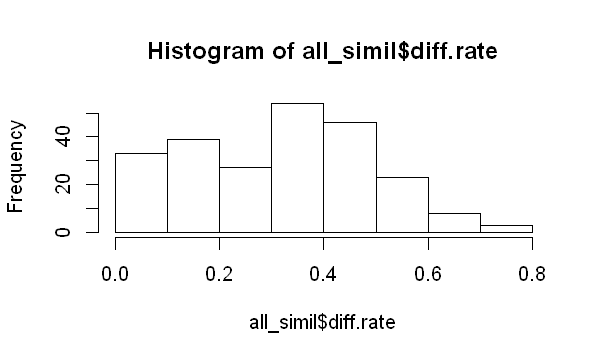

In [98]:
hist(all_simil$diff.rate)

#### Now we set a threshold on these differences

In [99]:
threshold <- 0.3

#### Then we drop all the words not meeting this threshold using the function df_cleaner.

In [100]:
Word_List <- all_simil[all_simil$diff.rate < threshold, ]$words
# head(all_simil[all_simil$diff.rate < threshold, ])

In [101]:
# df_corp <- VCorpus(VectorSource(as.character(df$Text)))
# df_corp <- tm_map(df_corp , stripWhitespace)                #removing white spaces
# df_corp <- tm_map(df_corp , removeWords, Word_List)        #removing based on the Word List obtained via thresholding
# df_dtm  <- DocumentTermMatrix(df_corp,
#                                control = list(tolower = TRUE,
#                                             removeNumbers = TRUE,
#                                             stopwords = TRUE,
#                                             removePunctuation = TRUE,
#                                             stemming = TRUE))

### ...and the reuslt?

In [102]:
df_dtm <- df_cleaner(df, threshold= 0.3, minfreq = 10, binom = TRUE)
train_test_splitter(df_dtm, df, test_ratio=0.15, SEED= 5)
nbc <- Train(X_train, Y_train)
Y_pred_train <- Predict(nbc, X_train)
Y_pred       <- Predict(nbc, X_test)

Train Set Size: 2560
Test  Set Size: 550
Validation Set Size: 561

In [103]:
cat("Train accuracy:",     score(Y_train, Y_pred_train))
cat("\nTest  accuracy:",   score(Y_test, Y_pred))

Train accuracy: 0.7246094
Test  accuracy: 0.6163636

As we can see the train accuracy is the same but now the test accuracy seems to be little larger! Indeed a valid investigation of  the effect of thresholding should involve averaging over differnt seeds, but let's keep this parameter as a way to reduce the complexity of the model.

## Hyper Parameter Tuning (Multinomial Case) <a class="anchor" id="hyper"></a>

As an essential part of any machine learning task we perform hyper paramter tuning to reduce the train a better predictor and also reduce the complexity of the model. For the Multinomial case we only consider minfreq, the minimum number a word is repeated in the dataframe as our hyper parameter. Later for the case of binomial, our defined threshold will be also considered. 

In [59]:
minfreq.list   <- c(10, 15, 20, 25, 30)   #minfreq > 10

In [70]:
label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function

In [71]:
grid <- data.frame(matrix(ncol = 3, nrow = 0))
params <- c("min.frequecny", "train.acc", "val.acc")
colnames(grid) <- params

In [72]:
# for (minfreq in minfreq.list){
#     df_dtm <- df_cleaner(df, threshold=0, minfreq, binom = FALSE)
#     train.acc <- vector() ; val.acc  <- vector()
#     for (SEED in 1:20){               #averaging over some number of seeds
#         train_test_splitter(df_dtm, df, test_ratio = 0.15, SEED)
#         nbc <-Train(X_train, Y_train) #training process
#         #         train.acc <- append(train.acc, score(Y_train, Predict(nbc, X_train)))  #storing the train accuracy
#         train.acc <- 1
#         val.acc  <-  append(val.acc,  score(Y_val,  Predict(nbc, X_val )))     #storing the validation accuracy
#         }

#     grid[nrow(grid) + 1,] = c(minfreq, mean(train.acc), mean(val.acc))
#     }

# write.csv(grid, "./data_res/gridsearch_multi_new.csv")

In [91]:
grid <- read.csv("./data_res/gridsearch_multi.csv")

In [92]:
head(grid[order(-grid$val.acc),])

,X,min.frequecny,train.acc,val.acc
1,1,10,0.4688428,0.2279693
4,4,25,0.3797282,0.2269476
2,2,15,0.4340852,0.2263729
5,5,30,0.3648641,0.2243295
3,3,20,0.4028019,0.2226692


## Hyper Parameter Tuning (Binomial Case) <a class="anchor" id="hyperbino"></a>

Now we repeat the tuning for binomial case. This time considering both minfreq and threshold as our hyper paramters:

In [93]:
minfreq.list   <- c(5, 10, 15, 20,   25)   #minfreq > 1
threshold.list <- c(0, 0.1,0.3, 0.5, 0.7)

In [94]:
label.list <- c(1,5)   #the labels:0,1,2,3,4,5
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5
hm <- hist(df$Labels, plot = FALSE)  #saving for later use in the predictor function

In [95]:
grid <- data.frame(matrix(ncol = 4, nrow = 0))
params <- c("min.frequecny","threshold", "train.acc", "val.acc")
colnames(grid) <- params

In [96]:
# for (threshold in threshold.list){
#     for (minfreq in minfreq.list){
#         df_dtm <- df_cleaner(df_2, threshold, minfreq, binom = TRUE)
#         train.acc <- vector() ; val.acc  <- vector()
#         for (SEED in 1:20){          #averaging over a number of seeds
#             train_test_splitter(df_dtm, df_2, test_ratio = 0.15, SEED)
#             nbc <- Train(X_train, Y_train) #training process
#             train.acc <- append(train.acc, score(Y_train, Predict(nbc, X_train)))
#             val.acc  <- append(val.acc,  score(Y_val,  Predict(nbc, X_val )))
                 
#             }
        
#         grid[nrow(grid) + 1,] = c(minfreq,threshold, mean(train.acc), mean(val.acc))
#     }
# }

# write.csv(grid, "./data_res/gridsearch_binom_new.csv")

In [97]:
grid <- read.csv("./data_res/gridsearch_binom.csv")
head(grid[order(-grid$val.acc),])

,X,min.frequecny,threshold,train.acc,val.acc
14,14,20,0.3,0.6803125,0.6570410
5,5,25,0.0,0.6683594,0.6547237
9,9,20,0.1,0.6813281,0.6518717
15,15,25,0.3,0.6703125,0.6511586
25,25,25,0.7,0.6632031,0.6509804
4,4,20,0.0,0.6760156,0.6508021


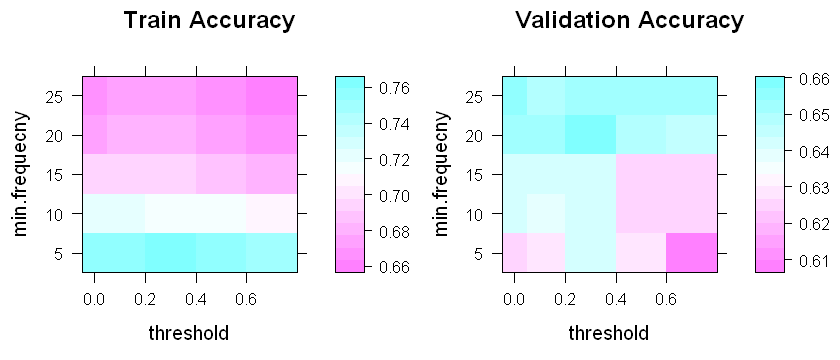

In [125]:
options(repr.plot.width=7, repr.plot.height =3)  #changing size of plots
train <- levelplot(train.acc ~ threshold*min.frequecny, data=grid,   main= "Train Accuracy")  
val   <- levelplot(val.acc   ~ threshold*min.frequecny, data=grid,   main= "Validation Accuracy")  
grid.arrange(train, val ,ncol=2)

# Comparing the Accuracies <a class="anchor" id="acc"></a>

Now with tuned models we can carry out the main part of the project. Evaluating the performance of the models on the test set.
We test all three NaiveBayes classifers discussed so far. Different sets of labels are considered. The parameters are chosen as the best ones obtained through tuning processes:

In [128]:
best.minfreq   <- 20   #20 is the best minfreq both for binmoal and the multilabel cases 
best.threshold <- 0.3  #best for the binomial, not used for the multilabel case

In [129]:
df.acc <- data.frame(matrix(ncol = 7, nrow = 0))
params <- c("No.of.Labels",
            "Train.Acc.e1071", "Test.Acc.e1071","Train.Acc.fastnaive",
            "Test.Acc.fastnaive", "Train.Acc.Model", "Test.Acc.Model")

colnames(df.acc) <- params

In [12]:
#We so the train and testing using differnt sets of labels
Label_List <- list(c(1,5), c(1,4,5), c(1,2,4,5), c(0,1,2,4,5), c(0,1,2,3,4,5))


for (label.list in Label_List){
    binom <- FALSE ; best.threshold <- 0    #for multi-label cases, here best.threshold is dummy
    if (length(label.list) == 2) {binom = TRUE ; best.threshold <- 0.3} #for the binomial case
    
    df <- read.csv("./data/train.csv")       #these line are the preprocessing which are same for all classifers
    df  <- df[df$Labels %in% label.list, ] 
    hm    <- hist(df$Labels, plot =FALSE)    
    df_dtm <- df_cleaner(df, threshold=best.threshold , minfreq=best.minfreq, binom )
    
    train.e10 <- vector() ; train.fastnaive <- vector(); train.model <- vector()
    test.e10  <- vector() ; test.fastnaive  <- vector(); test.model  <- vector()
    
    for (SEED in 1:5){    #considering an ensemble of 5 for stabilizing the result

        #===========e1071============#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        NBC <- naiveBayes(X_train, Y_train)
        train.e10 <- append(train.e10, score(Y_train, predict(NBC, X_train)))  #storing the scores
        test.e10  <- append(test.e10,  score(Y_test,  predict(NBC, X_test )))    
        
        #==========fastnaive========#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        fast_nbc <- fnb.multinomial(X_train, Y_train)
        train.fastnaive <- append(train.fastnaive, score(Y_train, predict(fast_nbc, X_train)))
        test.fastnaive  <- append(test.fastnaive,  score(Y_test,  predict(fast_nbc, X_test ))) 
        
        #==========model============#
        train_test_splitter(df_dtm, df, 0.2, SEED)
        nbc <- Train(X_train, Y_train) 
        train.model <- append(train.model, score(Y_train, Predict(nbc, X_train)))
        test.model  <- append(test.model,  score(Y_test,  Predict(nbc, X_test )))       
        
        }
    
    df.acc[nrow(df.acc) + 1,] <- c(length(label.list), 
                                  mean(train.e10), mean(test.e10),
                                  mean(train.fastnaive), mean(test.fastnaive),
                                  mean(train.model), mean(test.model)) 
   }


Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671Train Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The sum of Samples: 3671words matching: TRUEwords matching: TRUETrain Set Size: 2409
Test  Set Size: 734
Validation Set Size: 528
The 

In [ ]:
# write.csv(df.acc, "./all_acc_new.csv")

In [131]:
df.acc <- read.csv("./all_acc_new.csv")

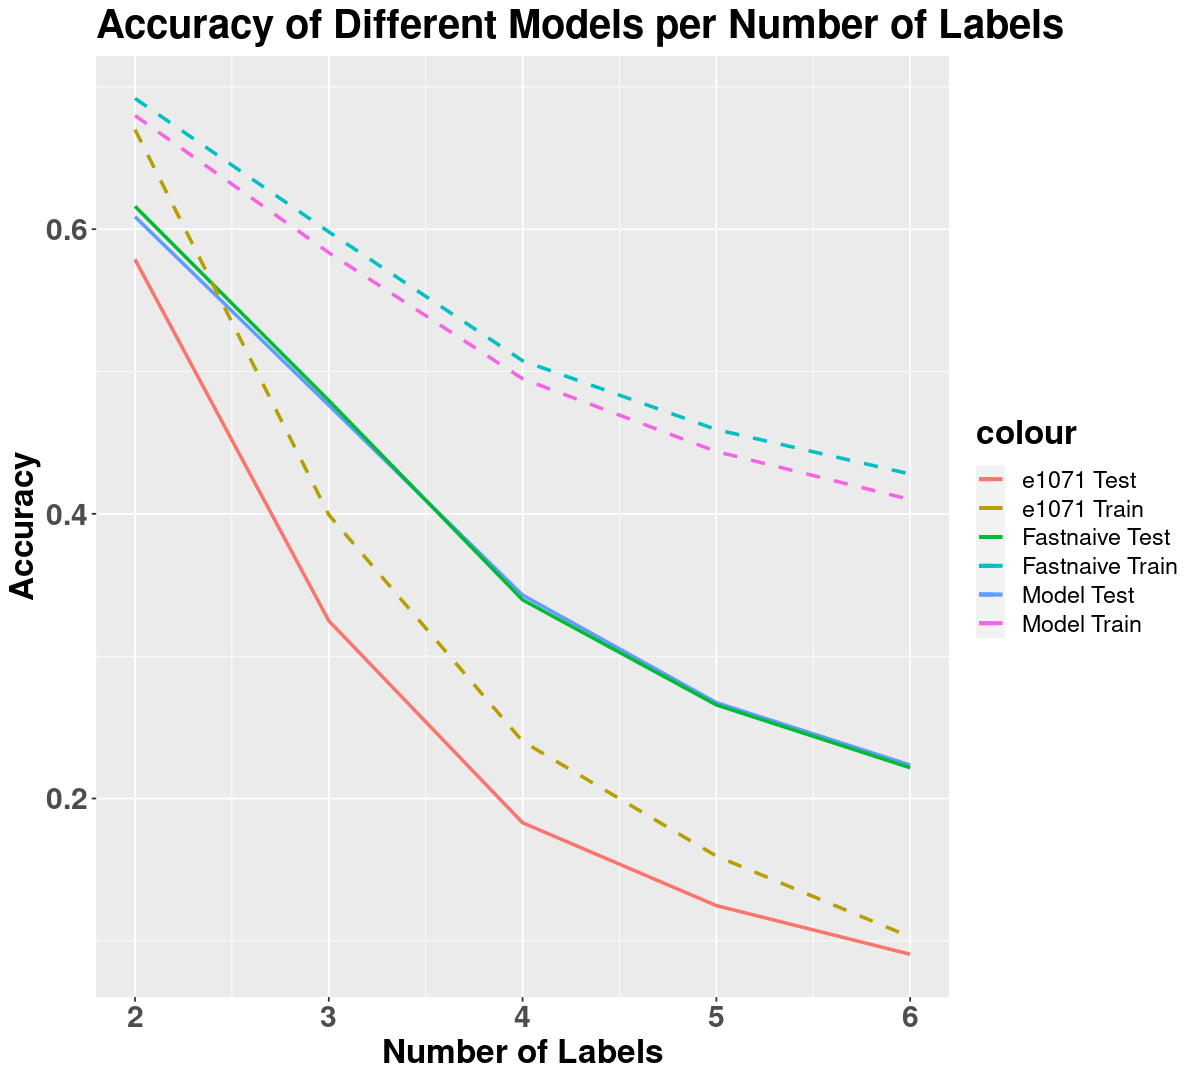

In [46]:
options(repr.plot.width=10, repr.plot.height =9)  #changing size of plots

ggplot(data = df.acc, aes(x = No.of.Labels)) +
  geom_line(aes(y = Test.Acc.Model, colour = "Model Test"),         lwd=1) + 
  geom_line(aes(y = Test.Acc.fastnaive, colour = "Fastnaive Test"), lwd=1) + 
  geom_line(aes(y = Test.Acc.e1071, colour = "e1071 Test"),         lwd=1) + 
  
  geom_line(aes(y = Train.Acc.Model, colour = "Model Train", ), linetype = "dashed",  lwd=1) + 
  geom_line(aes(y = Train.Acc.fastnaive, colour = "Fastnaive Train"),linetype = "dashed", lwd=1) + 
  geom_line(aes(y = Train.Acc.e1071, colour = "e1071 Train"),  linetype = "dashed",       lwd=1) + 

  labs(title = "Accuracy of Different Models per Number of Labels",
         x = "Number of Labels",
         y = "Accuracy") +
  theme(legend.text = element_text(size = 14),
      axis.text.y = element_text(face="bold", size=18),
      axis.text.x = element_text(face="bold", size=18),  
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      title =element_text(size=20, face='bold'))

The classifer which is refered as "Model" is the one we manually built.

## Computation Time <a class="anchor" id="comp"></a>

Finally we perform a computation time evaluation over the three discussed methods:

In [ ]:
df_5 <- read.csv("./data/train.csv")
label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5
df_5  <- df_5[df_5$Labels %in% label.list, ]
hm    <- hist(df_5$Labels, plot =FALSE)    
cat("dataset size:", nrow(df_5))

In [ ]:
comp.time <- data.frame(matrix(ncol = 7, nrow = 0))
params <- c("Dataset.Size",
            "Comp.Time.e1071 [s]", "Comp.Time.fastnaive [s]", "Comp.Time.model [s]", 
            "Test.Acc.e1071",    "Test.Acc.fastnaive", "Test.Acc.model")

colnames(comp.time) <- params

In [ ]:
#N: Dataset Size
N <- seq(1000, 10000, 1000)    # min>200

for (n in N){
    df <- sample_n(df_5,n)    #we measure the computation time using whole set of lables
    hm <- hist(df$Labels, plot =FALSE)
    df_dtm <- df_cleaner(df, 0.3, 25, binom= FALSE)
    train_test_splitter(df_dtm, df, 0.2, SEED = 5)
    
 #==========Our Model======================# 
    start.time <- Sys.time()
    
    nbc <- Train(X_train, Y_train)
    Y_pred <- Predict(nbc, X_test )
    
    end.time <- Sys.time()
    runtime.model <-  end.time - start.time
    test.acc.model <- score(Y_test,  Y_pred)
 #=========================================#
    
 #==========fastnaive========================# 
    train_test_splitter(df_dtm, df, 0.2, SEED = 6)
    start.time <- Sys.time()
    
    fast_nbc <- fnb.multinomial(X_train, Y_train)
    Y_pred <- predict(fast_nbc, X_test)
    
    end.time  <- Sys.time()
    runtime.fastnaive <- end.time - start.time
    test.acc.fastnaive <- score(Y_test,  Y_pred)  
 #=========================================#
    
 #==========e1071========================# 
    train_test_splitter(df_dtm, df, 0.2, SEED = 6)
    start.time <- Sys.time()
    
    NBC <- naiveBayes(X_train, Y_train) #training process
    Y_pred <- predict(NBC, X_test)
    
    end.time  <- Sys.time()
    runtime.e1071  <- end.time - start.time
    test.acc.e1071 <- score(Y_test,  Y_pred)  
 #=========================================#    
    
    comp.time[nrow(comp.time) + 1,] = c(n, runtime.e1071, runtime.fastnaive,runtime.model, 
                                        test.acc.e1071, test.acc.fastnaive, test.acc.model)
    }

# write.csv(comp.time, "./comp_time_new.csv")

In [ ]:
comp.time <- read.csv("./comp_time_new.csv")

options(repr.plot.width=10, repr.plot.height =9)  #changing size of plots

ggplot(data = comp.time, aes(x = Dataset.Size)) +
  geom_line(aes(y = Comp.Time.e1071..s.    ,     colour = "e1071 "),    lwd=1) + 
  geom_line(aes(y = Comp.Time.fastnaive..s.,     colour = "Fastnaive"), lwd=1) + 
  geom_line(aes(y = Comp.Time.model..s.    ,     colour = "Model"),     lwd=1) + 
  
  labs(title = "Computation Time [Train+Predict] of Different Models per Dataset Size",
       x = "Dataset Size",
       y = "Time [S]") +
  theme(legend.text = element_text(size = 14),
      axis.text.y = element_text(face="bold", size=18),
      axis.text.x = element_text(face="bold", size=18),  
      axis.title.x = element_text(size = 20),
      axis.title.y = element_text(size = 20),
      title =element_text(size=20, face='bold'))

## Testing on The dataset without labels <a class="anchor" id="less"></a>

In [ ]:
DF <- read.csv("./data/train.csv")
DF2<- read.csv("./data/test.csv")
df_sub<-DF[,-1]
DF_comb<-rbind(df_sub,DF2)
head(DF_comb)
cat("dataset size:", nrow(DF_comb))

In [ ]:
label.list <- c(0,1,2,3,4,5)   #the labels:0,1,2,3,4,5
df <- DF[DF$Labels %in% label.list, ] #the labels:0,1,2,3,4,5


In [ ]:
df_dtm <- df_cleaner(DF_comb, threshold= 0.3, minfreq = 10, binom = TRUE)
df_dtm

In [ ]:
X<- data.frame(as.matrix(df_dtm), stringsAsFactors=FALSE)
Y<- df$Labels

In [ ]:
X_train   <- X[1:10240, ]
X_test    <- X[10241:11507, ]
Y_train   <- Y

# Conclusion <a class="anchor" id="con"></a>

In this project we tried to build a Naive Bayes Classifer which is supposed to distinguish between fake and true news. We started with a multinomial classifer, constructed the train and predictor. A training dataset can be given as the input and a corresponding model is build based on that. Then we use our predict function to test the new samples. Although there were some progress when moving from a multinomial to a binomial case, but the accuracy we get in both cases is not so sufficiently large.  We think that in order to increase the accuracy we need a larger dataset for the model to be well trained on. 

# Bibliography <a class="anchor" id="bib"></a>

Chen, Y., Conroy, N.J., Rubin, V.L., 2015. News in an online world: The need for an ”automatic crap detector”, in: Proceedings of the 78th
ASIS&T Annual Meeting: Information Science with Impact: Research in and for the Community, American Society for Information Science,
Silver Springs, MD, USA. pp. 81:1–81:4. URL: http://dl.acm.org/citation.cfm?id=2857070.2857151